In [1]:
import matplotlib.pyplot as plt
import shap
from chessplainer.wrapper import EngineWrapper, ChessExplainer
import chess
import matplotlib
import matplotlib.colors as colors
plt.rcParams['font.family'] = 'DejaVu Sans'

True


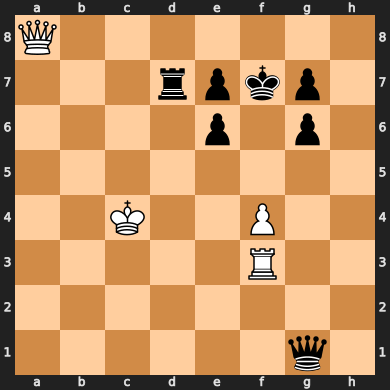

In [2]:
# Self-blocking pawn
board = chess.Board("Q7/3rpkp1/4p1p1/8/1BK2P2/2P2R2/8/6q1 b - - 0 1")
board = chess.Board("R7/4pkp1/2n1p1p1/8/2K2P2/5R2/8/6r1 b - - 0 1")  # black to move
board = chess.Board("R7/4pkp1/3bp1p1/8/2K2P2/5R2/8/6r1 b - - 0 1")  # white to move
board = chess.Board("R7/4pkp1/3bp1p1/8/2K2P2/5R2/8/6r1 w - - 0 1")  # white to move
board = chess.Board("K7/2Rpp3/N1P2p2/3kPQ2/Rnp5/Bn1rpP2/2B1N3/8 w - - 0 1")
board = chess.Board("Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 w - - 0 1")
print(board.turn)
board

In [3]:
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=dict(time=5),
    predict_limit_kwargs=dict(time=0.1),
)

In [4]:
engine.fit([board])
engine.base_score_

array([[0.031, 0.969]])

In [5]:
chesshap = ChessExplainer(board, engine, explainer=shap.KernelExplainer)# , explainer_fit_kwargs=dict(algorithm="partition"))
print(chesshap.engine.base_score_)

[[0.031 0.969]]


In [6]:
chesshap.explain()

  0%|          | 0/1 [00:00<?, ?it/s]

.values =
array([[[-0.43318294,  0.43318294],
        [ 0.29236349, -0.29236349],
        [-0.14851032,  0.14851032],
        [-0.02235317,  0.02235317],
        [-0.08325317,  0.08325317],
        [-0.33279008,  0.33279008],
        [-0.0900127 ,  0.0900127 ],
        [-0.08395794,  0.08395794],
        [ 0.43269683, -0.43269683]]])

.base_values =
array([[0.5, 0.5]])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]])

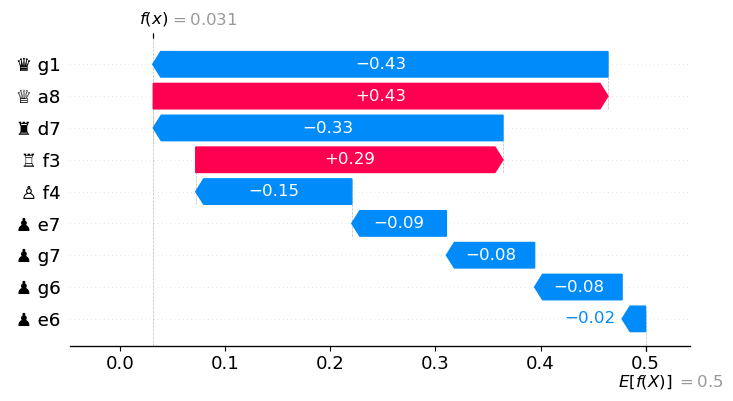

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


chesshap.explanation_.feature_names = chesshap.feature_names
# chesshap.explanation_.feature_names = chesshap.df_["feature_name_display"].tolist()
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
# Extract and clean tick label texts
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]

fig = plt.gcf()
fig.set_size_inches(8, 4)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)
# plt.style.use('default')
plt.grid(False)
plt.savefig("bad_pawn_shap.pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()


In [8]:
# chesshap.explainer_.expected_value, chesshap.engine.base_score_

In [26]:
chesshap.explanation_

.values =
array([[[-0.43646905,  0.43646905],
        [ 0.2913881 , -0.2913881 ],
        [-0.14855476,  0.14855476],
        [-0.02290714,  0.02290714],
        [-0.08211429,  0.08211429],
        [-0.33053333,  0.33053333],
        [-0.09260476,  0.09260476],
        [-0.08647857,  0.08647857],
        [ 0.43327381, -0.43327381]]])

.base_values =
array([[0.5, 0.5]])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [27]:
# chesshap.plot()

In [28]:
# chesshap.plot(absolute=False)

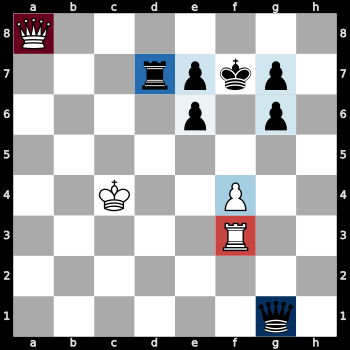

In [16]:
chesshap.to_svg(colors={
            "square light": "#ffffff",
            "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
            "margin": "#000000",
            # "coord": "#000000",
        },
    index=0
)

In [30]:
print(chesshap.to_latex(
    index=0
))


    \definecolor{shapg1}{HTML}{84BCD9}
\definecolor{shapf3}{HTML}{F8C1A6}
\definecolor{shapf4}{HTML}{D9E9F1}
\definecolor{shape6}{HTML}{F3F5F6}
\definecolor{shapg6}{HTML}{E7EFF4}
\definecolor{shapd7}{HTML}{A7CFE4}
\definecolor{shape7}{HTML}{E5EEF3}
\definecolor{shapg7}{HTML}{E5EEF3}
\definecolor{shapa8}{HTML}{EE9878}

    \newgame
    \chessboard[
      setfen=Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 w - - 0 1,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shapg1,
  colorbackfield={g1},
  color=shapf3,
  colorbackfield={f3},
  color=shapf4,
  colorbackfield={f4},
  color=shape6,
  colorbackfield={e6},
  color=shapg6,
  colorbackfield={g6},
  color=shapd7,
  colorbackfield={d7},
  color=shape7,
  colorbackfield={e7},
  color=shapg7,
  colorbackfield={g7},
  color=shapa8,
  colorbackfield={a8}
    ]
    


In [31]:
print(chesshap.to_latex(
    index=0,
    local_range=True
))


    \definecolor{shapg1}{HTML}{053061}
\definecolor{shapf3}{HTML}{C94641}
\definecolor{shapf4}{HTML}{A4CEE3}
\definecolor{shape6}{HTML}{EDF2F5}
\definecolor{shapg6}{HTML}{D2E5F0}
\definecolor{shapd7}{HTML}{286FB0}
\definecolor{shape7}{HTML}{CCE2EE}
\definecolor{shapg7}{HTML}{D1E5F0}
\definecolor{shapa8}{HTML}{67001F}

    \newgame
    \chessboard[
      setfen=Q7/3rpkp1/4p1p1/8/2K2P2/5R2/8/6q1 w - - 0 1,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shapg1,
  colorbackfield={g1},
  color=shapf3,
  colorbackfield={f3},
  color=shapf4,
  colorbackfield={f4},
  color=shape6,
  colorbackfield={e6},
  color=shapg6,
  colorbackfield={g6},
  color=shapd7,
  colorbackfield={d7},
  color=shape7,
  colorbackfield={e7},
  color=shapg7,
  colorbackfield={g7},
  color=shapa8,
  colorbackfield={a8}
    ]
    


True


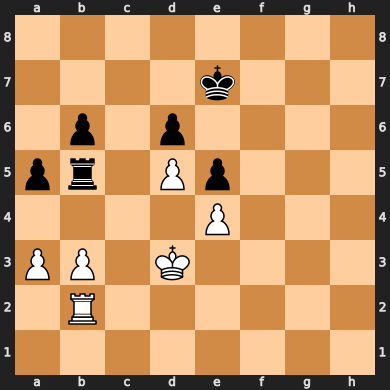

In [19]:
# Trapped rook
board = chess.Board("8/4k2p/1p1p2p1/pr1Pp3/4P3/PP1K4/1R4PP/8 w - - 0 31")
board = chess.Board("8/4k3/1p1p4/pr1Pp3/4P3/PP1K4/1R6/8 w - - 0 31")
print(board.turn)
board



[[0.975 0.025]]


  0%|          | 0/1 [00:00<?, ?it/s]

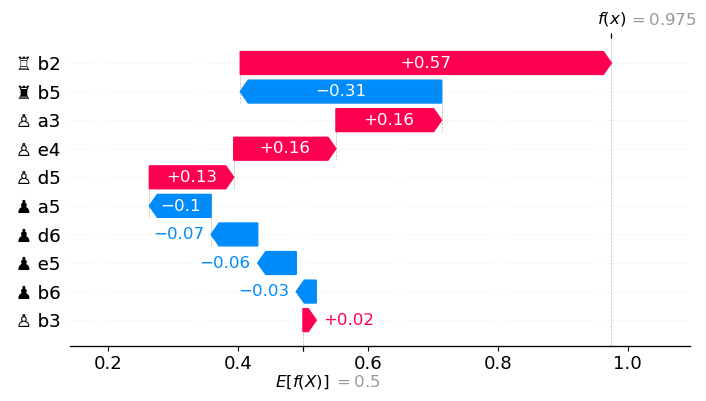

.values =
array([[[ 0.57155992, -0.57155992],
        [ 0.16273611, -0.16273611],
        [ 0.02049405, -0.02049405],
        [ 0.15745635, -0.15745635],
        [-0.09511865,  0.09511865],
        [-0.31014405,  0.31014405],
        [ 0.12995794, -0.12995794],
        [-0.0593754 ,  0.0593754 ],
        [-0.03075476,  0.03075476],
        [-0.07181151,  0.07181151]]])

.base_values =
array([[0.5, 0.5]])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [20]:
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=dict(time=5),
    predict_limit_kwargs=dict(time=0.1),
)

engine.fit([board])
engine.base_score_
chesshap = ChessExplainer(board, engine,
                          explainer=shap.KernelExplainer)  # , explainer_fit_kwargs=dict(algorithm="partition"))
print(chesshap.engine.base_score_)
chesshap.explain()
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns


chesshap.explanation_.feature_names = chesshap.feature_names
# chesshap.explanation_.feature_names = chesshap.df_["feature_name_display"].tolist()
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
# Extract and clean tick label texts
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]

fig = plt.gcf()
fig.set_size_inches(8, 4)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)

plt.savefig("trapped_rook_shap.pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()

# chesshap.explainer_.expected_value, chesshap.engine.base_score_
chesshap.explanation_
# chesshap.plot()
# chesshap.plot(absolute=False)


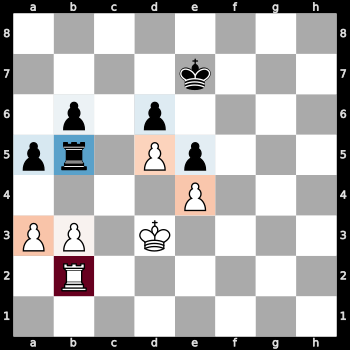

In [92]:
chesshap.to_svg(colors={
    "square light": "#ffffff",
    "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
    "margin": "#000000",
    # "coord": "#000000",
},
    index=0
)


In [21]:
print(chesshap.to_latex(
    index=0
))
print(chesshap.to_latex(
    index=0,
    local_range=True
))


    \definecolor{shapb2}{HTML}{D96853}
\definecolor{shapa3}{HTML}{FBE0D0}
\definecolor{shapb3}{HTML}{F7F4F2}
\definecolor{shape4}{HTML}{FBE0D0}
\definecolor{shapa5}{HTML}{E4EEF3}
\definecolor{shapb5}{HTML}{AED3E6}
\definecolor{shapd5}{HTML}{FAE4D7}
\definecolor{shape5}{HTML}{EBF1F4}
\definecolor{shapb6}{HTML}{F1F4F6}
\definecolor{shapd6}{HTML}{E8F0F4}

    \newgame
    \chessboard[
      setfen=8/4k3/1p1p4/pr1Pp3/4P3/PP1K4/1R6/8 w - - 0 31,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shapb2,
  colorbackfield={b2},
  color=shapa3,
  colorbackfield={a3},
  color=shapb3,
  colorbackfield={b3},
  color=shape4,
  colorbackfield={e4},
  color=shapa5,
  colorbackfield={a5},
  color=shapb5,
  colorbackfield={b5},
  color=shapd5,
  colorbackfield={d5},
  color=shape5,
  colorbackfield={e5},
  color=shapb6,
  colorbackfield={b6},
  color=shapd6,
  colorbackfield={d6}
    ]
    

    \definecolor{shapb2}{HTML}{67001F}
\definecolor{shapa3}{HTML}{F9C3A9}
\de

False


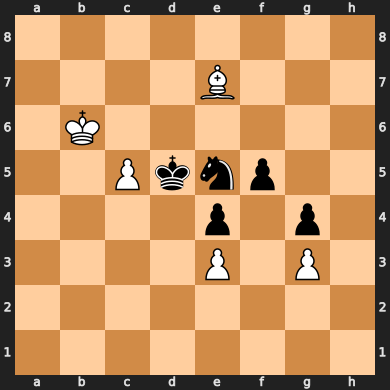

In [26]:
# Good knight vs bishop
# https://en.chessbase.com/post/endgame-blog-karsten-mueller-2020_38e#
board = chess.Board("8/4B3/1K6/2Pknp2/4p1p1/4P1P1/8/8 b - - 0 133")
print(board.turn)
board



[[0.113 0.887]]


  0%|          | 0/1 [00:00<?, ?it/s]

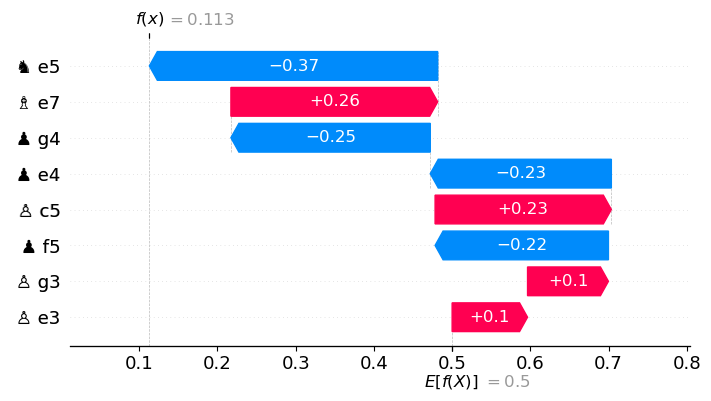

.values =
array([[[ 0.09640119, -0.09640119],
        [ 0.10338214, -0.10338214],
        [-0.23142024,  0.23142024],
        [-0.25483452,  0.25483452],
        [ 0.2252869 , -0.2252869 ],
        [-0.36857024,  0.36857024],
        [-0.2215631 ,  0.2215631 ],
        [ 0.26431786, -0.26431786]]])

.base_values =
array([[0.5, 0.5]])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1.]])

In [23]:
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=dict(time=5),
    predict_limit_kwargs=dict(time=0.1),
)

engine.fit([board])
engine.base_score_
chesshap = ChessExplainer(board, engine,
                          explainer=shap.KernelExplainer)  # , explainer_fit_kwargs=dict(algorithm="partition"))
print(chesshap.engine.base_score_)
chesshap.explain()
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns


chesshap.explanation_.feature_names = chesshap.feature_names
# chesshap.explanation_.feature_names = chesshap.df_["feature_name_display"].tolist()
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
# Extract and clean tick label texts
clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]

fig = plt.gcf()
fig.set_size_inches(8, 4)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)

plt.savefig("good_knight_bad_bishop.pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()

# chesshap.explainer_.expected_value, chesshap.engine.base_score_
chesshap.explanation_
# chesshap.plot()
# chesshap.plot(absolute=False)


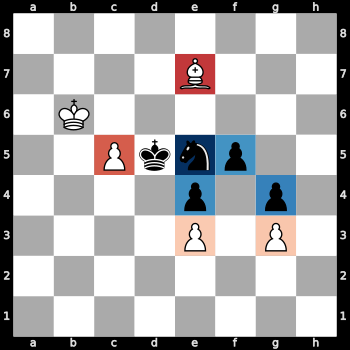

In [101]:
chesshap.to_svg(colors={
    "square light": "#ffffff",
    "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
    "margin": "#000000",
    # "coord": "#000000",
},
    index=0
)


In [24]:
# print(chesshap.to_latex(
#     index=0
# ))
print(chesshap.to_latex(
    index=0,
    local_range=True
))


    \definecolor{shape3}{HTML}{FACAB1}
\definecolor{shapg3}{HTML}{F9C5AB}
\definecolor{shape4}{HTML}{3D8BBF}
\definecolor{shapg4}{HTML}{337DB8}
\definecolor{shapc5}{HTML}{D35A4A}
\definecolor{shape5}{HTML}{053061}
\definecolor{shapf5}{HTML}{4393C3}
\definecolor{shape7}{HTML}{C03538}

    \newgame
    \chessboard[
      setfen=8/4B3/1K6/2Pknp2/4p1p1/4P1P1/8/8 b - - 0 133,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shape3,
  colorbackfield={e3},
  color=shapg3,
  colorbackfield={g3},
  color=shape4,
  colorbackfield={e4},
  color=shapg4,
  colorbackfield={g4},
  color=shapc5,
  colorbackfield={c5},
  color=shape5,
  colorbackfield={e5},
  color=shapf5,
  colorbackfield={f5},
  color=shape7,
  colorbackfield={e7}
    ]
    


True


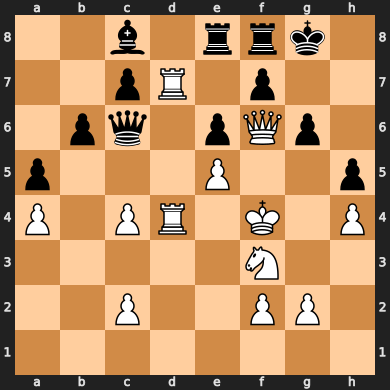

In [27]:
# active king
# https://www.chess.com/forum/view/general/king-as-offensive-piece
board = chess.Board("2b1rrk1/2pR1p2/1pq1pQp1/p3P2p/P1PR1K1P/5N2/2P2PP1/8 w - - 6 34")
print(board.turn)
board



In [28]:
engine = EngineWrapper(
    path="stockfish",
    output_improvement_delta=False,
    wdl_model="lichess",
    fit_limit_kwargs=dict(time=5),
    predict_limit_kwargs=dict(time=0.1),
)

engine.fit([board])
engine.base_score_
chesshap = ChessExplainer(board, engine,
                          explainer=shap.SamplingExplainer,
                          nsamples=10000,
                          #explainer_predict_kwargs={"max_evals": 5000000}
                          )  # , explainer_fit_kwargs=dict(algorithm="partition"))
print(chesshap.engine.base_score_)
chesshap.explain()





[[0.996 0.004]]


  0%|          | 0/1 [00:00<?, ?it/s]

.values =
array([[[ 0.05743159, -0.05743159],
        [ 0.03086561, -0.03086561],
        [ 0.04016201, -0.04016201],
        [ 0.12455044, -0.12455044],
        [ 0.0677743 , -0.0677743 ],
        [ 0.04337243, -0.04337243],
        [ 0.20166181, -0.20166181],
        [ 0.02135999, -0.02135999],
        [-0.05204346,  0.05204346],
        [ 0.0677526 , -0.0677526 ],
        [-0.02833341,  0.02833341],
        [-0.02434679,  0.02434679],
        [-0.31576023,  0.31576023],
        [-0.03079869,  0.03079869],
        [ 0.57528518, -0.57528518],
        [-0.04107092,  0.04107092],
        [-0.02336098,  0.02336098],
        [ 0.26355126, -0.26355126],
        [ 0.05661803, -0.05661803],
        [-0.06958637,  0.06958637],
        [-0.22915971,  0.22915971],
        [-0.23992468,  0.23992468]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]])

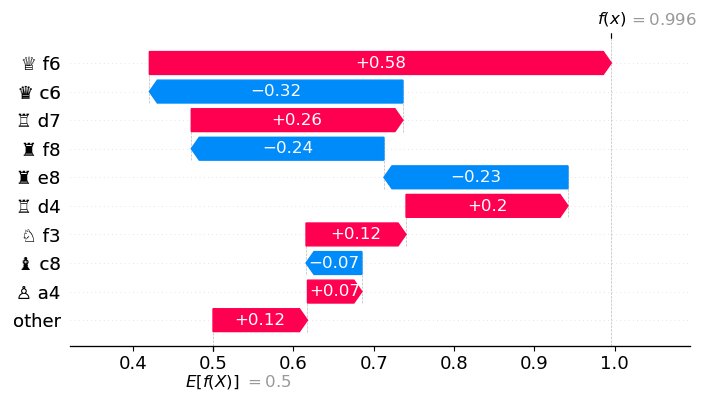

.values =
array([[[ 0.05743159, -0.05743159],
        [ 0.03086561, -0.03086561],
        [ 0.04016201, -0.04016201],
        [ 0.12455044, -0.12455044],
        [ 0.0677743 , -0.0677743 ],
        [ 0.04337243, -0.04337243],
        [ 0.20166181, -0.20166181],
        [ 0.02135999, -0.02135999],
        [-0.05204346,  0.05204346],
        [ 0.0677526 , -0.0677526 ],
        [-0.02833341,  0.02833341],
        [-0.02434679,  0.02434679],
        [-0.31576023,  0.31576023],
        [-0.03079869,  0.03079869],
        [ 0.57528518, -0.57528518],
        [-0.04107092,  0.04107092],
        [-0.02336098,  0.02336098],
        [ 0.26355126, -0.26355126],
        [ 0.05661803, -0.05661803],
        [-0.06958637,  0.06958637],
        [-0.22915971,  0.22915971],
        [-0.23992468,  0.23992468]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]])

In [29]:
plt.rcParams['font.family'] = 'DejaVu Sans'

chesshap.explanation_.feature_names = chesshap.feature_names
# chesshap.explanation_.feature_names = chesshap.df_["feature_name_display"].tolist()
shap.plots.waterfall(chesshap.explanation_[0, :, 0], max_display=10, show=False)
# Extract and clean tick label texts

clean_labels = [label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]
clean_labels = [label if "other" not in label else "other" for label in clean_labels]

fig = plt.gcf()
fig.set_size_inches(8, 4)

# Update the y-axis tick labels
plt.gca().set_yticklabels(clean_labels)
plt.style.use('default')
plt.grid(False)
# print(plt.gca().get_yticklabels())
plt.savefig("active_king.pdf", dpi="figure", format="pdf", transparent=True, bbox_inches="tight")

plt.show()

# chesshap.explainer_.expected_value, chesshap.engine.base_score_
chesshap.explanation_
# chesshap.plot()
# chesshap.plot(absolute=False)

In [51]:
clean_labels

['other',
 '♙ c2',
 '♘ f3',
 '♝ c8',
 '♜ e8',
 '♖ d4',
 '♜ f8',
 '♖ d7',
 '♛ c6',
 '♕ f6',
 'other',
 ' ♙ c2',
 ' ♘ f3',
 ' ♝ c8',
 ' ♜ e8',
 ' ♖ d4',
 ' ♜ f8',
 ' ♖ d7',
 ' ♛ c6',
 ' ♕ f6']

In [52]:
clean_labels

['other',
 '♙ c2',
 '♘ f3',
 '♝ c8',
 '♜ e8',
 '♖ d4',
 '♜ f8',
 '♖ d7',
 '♛ c6',
 '♕ f6',
 'other',
 ' ♙ c2',
 ' ♘ f3',
 ' ♝ c8',
 ' ♜ e8',
 ' ♖ d4',
 ' ♜ f8',
 ' ♖ d7',
 ' ♛ c6',
 ' ♕ f6']

In [53]:
a=[label.get_text().replace('1 = ', '') for label in plt.gca().get_yticklabels()]

In [54]:
a

['0.0', '0.2', '0.4', '0.6', '0.8', '1.0']

In [33]:
dir(chesshap.explainer_)

['D',
 'M',
 'N',
 'P',
 'X_masked',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_convert_symbolic_tensor',
 '_instantiated_load',
 'addsample',
 'allocate',
 'data',
 'expected_value',
 'explain',
 'explain_row',
 'fnull',
 'fx',
 'keep_index',
 'keep_index_ordered',
 'link',
 'linkfv',
 'load',
 'model',
 'not_equal',
 'nsamples',
 'nsamplesAdded',
 'nsamplesRun',
 'run',
 'sampling_estimate',
 'save',
 'shap_values',
 'solve',
 'supports_model_with_masker',
 'varyingInds',
 'varying_groups',
 'vector_out']

In [36]:
chesshap.explanation_

.values =
array([[[ 0.05743159, -0.05743159],
        [ 0.03086561, -0.03086561],
        [ 0.04016201, -0.04016201],
        [ 0.12455044, -0.12455044],
        [ 0.0677743 , -0.0677743 ],
        [ 0.04337243, -0.04337243],
        [ 0.20166181, -0.20166181],
        [ 0.02135999, -0.02135999],
        [-0.05204346,  0.05204346],
        [ 0.0677526 , -0.0677526 ],
        [-0.02833341,  0.02833341],
        [-0.02434679,  0.02434679],
        [-0.31576023,  0.31576023],
        [-0.03079869,  0.03079869],
        [ 0.57528518, -0.57528518],
        [-0.04107092,  0.04107092],
        [-0.02336098,  0.02336098],
        [ 0.26355126, -0.26355126],
        [ 0.05661803, -0.05661803],
        [-0.06958637,  0.06958637],
        [-0.22915971,  0.22915971],
        [-0.23992468,  0.23992468]]])

.base_values =
array([0.5, 0.5])

.data =
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]])

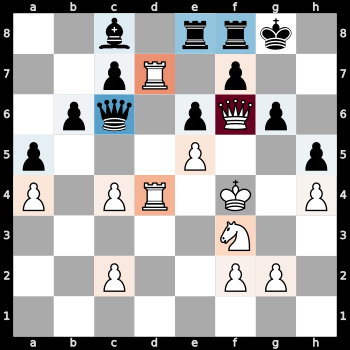

In [30]:
chesshap.to_svg(colors={
    "square light": "#ffffff",
    "square dark": "#aaaaaa",  # or use #cccccc for lighter gray
    "margin": "#000000",
    # "coord": "#000000",
},
    index=0
)


In [37]:
# print(chesshap.to_latex(
#     index=0
# ))
print(chesshap.to_latex(
    index=0,
    local_range=True
))


    \definecolor{shapc2}{HTML}{F9E9DF}
\definecolor{shapf2}{HTML}{F8EFEA}
\definecolor{shapg2}{HTML}{F9EDE7}
\definecolor{shapf3}{HTML}{FCD6C1}
\definecolor{shapa4}{HTML}{FAE5D9}
\definecolor{shapc4}{HTML}{F9ECE5}
\definecolor{shapd4}{HTML}{F6B293}
\definecolor{shaph4}{HTML}{F8F2EE}
\definecolor{shapa5}{HTML}{E5EEF3}
\definecolor{shape5}{HTML}{FAE5D9}
\definecolor{shaph5}{HTML}{EDF2F5}
\definecolor{shapb6}{HTML}{EEF3F5}
\definecolor{shapc6}{HTML}{559EC9}
\definecolor{shape6}{HTML}{EDF2F5}
\definecolor{shapf6}{HTML}{67001F}
\definecolor{shapg6}{HTML}{E8F0F4}
\definecolor{shapc7}{HTML}{EEF3F5}
\definecolor{shapd7}{HTML}{EB9072}
\definecolor{shapf7}{HTML}{F9E9DF}
\definecolor{shapc8}{HTML}{DFECF2}
\definecolor{shape8}{HTML}{93C5DE}
\definecolor{shapf8}{HTML}{8AC0DB}

    \newgame
    \chessboard[
      setfen=2b1rrk1/2pR1p2/1pq1pQp1/p3P2p/P1PR1K1P/5N2/2P2PP1/8 w - - 6 34,
      boardfontencoding=LSBC1,
      pgfstyle=color,
      opacity=0.7,
      color=shapc2,
  colorbackfield={c2},
  